In [2]:
from scipy.integrate import quad, dblquad
from math import factorial, exp, sqrt, pi
import numpy as np
import matplotlib.pyplot as plt

def integrand(x, a, b):
    return a*x**2 + b

a = 2
b = 1
I = quad(integrand, 0, 1, args=(a,b))
I

(1.6666666666666667, 1.8503717077085944e-14)

In [3]:
def integrand(x, y, s, m):
    pois = exp(x*y)*exp(-exp(x))/factorial(y)
    norm = exp(-0.5*((x-m)/s)**2)/(s * sqrt(2*pi))
    return  pois * norm

y = 0
m = 1.75
s = 0.15
I = quad(integrand, -10, 10, args=(y,s,m))
I

(0.004177039294506781, 1.2136816324931148e-09)

In [4]:
y = np.arange(0,21)
p = []
for yi in y:
    I = quad(integrand, -10, 10, args=(yi,s,m))
    p.append(I[0])

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

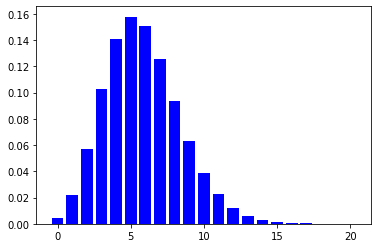

In [5]:
plt.bar(y, p, color='b')
plt.plot

In [6]:
lamb = np.sum([y[i]*p[i] for i in range(len(y))])

In [7]:
lamb

5.8195370497570895

In [8]:
real_pois = []
for yi in y:
    I = (lamb**yi) * exp(-lamb) / factorial(yi)
    real_pois.append(I)

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

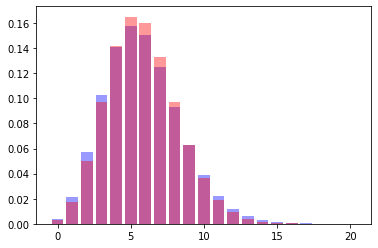

In [12]:
plt.bar(y, p, color='b', alpha = 0.4)
plt.bar(y, real_pois, color='r', alpha = 0.4)
plt.plot

In [201]:
def dblintegrand(y, x, log_λₕ_μ, log_λₕ_σ, log_λₐ_μ, log_λₐ_σ):
    normₕ = exp(-0.5*((x-log_λₕ_μ)/log_λₕ_σ)**2)/(log_λₕ_σ * sqrt(2*pi))
    normₐ = exp(-0.5*((y-log_λₐ_μ)/log_λₐ_σ)**2)/(log_λₐ_σ * sqrt(2*pi))
    λₕ = exp(x)
    λₐ = exp(y)
    p = normₐ*normₕ*λₕ/(λₕ + λₐ)
    return p

log_λₕ_μ = 1.0 + 0.2 + -0.249 - 0.028
log_λₕ_σ = 0.15
log_λₐ_μ = 1.0 + 0.1758 - -0.1808
log_λₐ_σ = 0.15

lwr = -10
upr = 10

I = dblquad(dblintegrand, lwr, upr, lwr, upr, args=(log_λₕ_μ, log_λₕ_σ, log_λₐ_μ, log_λₐ_σ))
I

(0.3943896909286598, 1.4724357315562116e-08)

In [203]:
def dblintegrand(y, x, log_λₕ_μ, log_λₕ_σ, log_λₐ_μ, log_λₐ_σ):
    normₕ = exp(-0.5*((x-log_λₕ_μ)/log_λₕ_σ)**2)/(log_λₕ_σ * sqrt(2*pi))
    normₐ = exp(-0.5*((y-log_λₐ_μ)/log_λₐ_σ)**2)/(log_λₐ_σ * sqrt(2*pi))
    λₕ = exp(x)
    λₐ = exp(y)
    p = normₐ*normₕ*(1 - exp(-1*(λₕ*t + λₐ*t)))
    return p

log_λₕ_μ = 1.0 + 0.2 + -0.249 - 0.028
log_λₕ_σ = 0.15
log_λₐ_μ = 1.0 + 0.1758 - -0.1808
log_λₐ_σ = 0.15
t = 5/60

lwr = -10
upr = 10

I = dblquad(dblintegrand, lwr, upr, lwr, upr, args=(log_λₕ_μ, log_λₕ_σ, log_λₐ_μ, log_λₐ_σ))
I

(0.4158698581813421, 1.2575018799979517e-08)